In [1]:
import string

import requests as rq
from bs4 import BeautifulSoup as bs
import numpy as np
from nltk import bigrams, FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline

en_stops = stopwords.words('english')

In [2]:
res = rq.get('https://en.wikipedia.org/wiki/Python_(programming_language)')
soup = bs(res.content)

In [3]:
uls = soup.find_all('ul')
index = np.where(['Graphical user interfaces' in u.text for u in uls])[0][0]
index

11

In [4]:
ul = uls[index]
# the last link is a citation note
links = ['https://wikipedia.org/' + l.attrs['href'] for l in ul.find_all('a')[:-1]]

In [5]:
links

['https://wikipedia.org//wiki/Automation',
 'https://wikipedia.org//wiki/Data_analytics',
 'https://wikipedia.org//wiki/Databases',
 'https://wikipedia.org//wiki/Documentation',
 'https://wikipedia.org//wiki/Graphical_user_interfaces',
 'https://wikipedia.org//wiki/Image_processing',
 'https://wikipedia.org//wiki/Machine_learning',
 'https://wikipedia.org//wiki/Mobile_App',
 'https://wikipedia.org//wiki/Multimedia',
 'https://wikipedia.org//wiki/Computer_networking',
 'https://wikipedia.org//wiki/Scientific_computing',
 'https://wikipedia.org//wiki/System_administration',
 'https://wikipedia.org//wiki/Test_framework',
 'https://wikipedia.org//wiki/Text_processing',
 'https://wikipedia.org//wiki/Web_framework',
 'https://wikipedia.org//wiki/Web_scraping']

In [6]:
all_text = []
for l in links:
    res = rq.get(l)
    soup = bs(res.content)
    all_text.extend(p.text for p in soup.find_all('p'))

In [7]:
full_text = ' '.join(all_text)
translator = str.maketrans('', '', string.punctuation + string.digits)
clean_text = full_text.translate(translator)
clean_words = [w for w in clean_text.lower().split() if w not in en_stops and len(w) > 3]

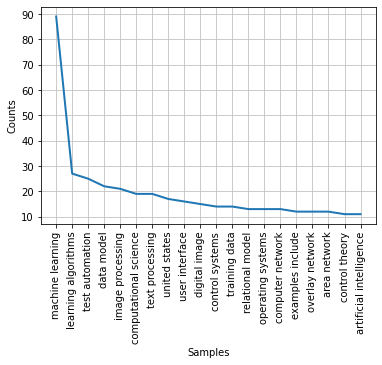

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [8]:
bgs = [' '.join(b) for b in bigrams(clean_words)]
bg_fd = FreqDist(bgs)
bg_fd.plot(20)

It looks like machine learning is a huge focus of the related pages. we also see topics in and around computer science and sofetware engineering, as well as some specific topics like text and images. 